# Linear Regression

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_salary = pd.read_csv('/content/salary_data.csv')
df_salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
df_salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


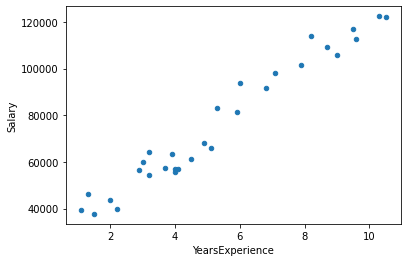

In [ ]:
df_salary.plot.scatter(x='YearsExperience', y='Salary')

In [ ]:
corr = df_salary.corr()
corr

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


## Split

In [ ]:
.75*30

22.5

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
train_data, test_data = train_test_split(df_salary, train_size=.75, random_state=44)

In [ ]:
test_data.shape

(8, 2)

## Feature & Label split

In [ ]:
train_label = train_data['Salary']
train_feature = train_data.drop(['Salary'], axis=1)
test_label = test_data['Salary']
test_feature = test_data.drop(['Salary'], axis=1)

In [ ]:
test_feature

,YearsExperience
23,8.2
21,7.1
2,1.5
24,8.7
16,5.1
11,4.0
12,4.0
18,5.9


## Train

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X=train_feature, y=train_label)

LinearRegression()

In [ ]:
lr_model.score(X=train_feature, y=train_label)

0.9638302694203285

In [ ]:
salary_pred = lr_model.predict(test_feature)
salary_pred

array([102485.78748192,  92510.42783211,  41726.77870581, 107020.0418682 ,
        74373.410287  ,  64398.0506372 ,  64398.0506372 ,  81628.21730505])

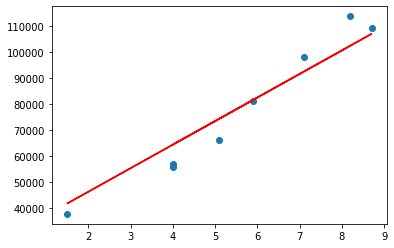

In [ ]:
plt.scatter(test_data['YearsExperience'], test_data['Salary'])
plt.plot(test_data['YearsExperience'], salary_pred, color='r')

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(test_label, salary_pred)

0.9290711894883029

In [ ]:
lr_model.coef_

array([9068.50877255])

In [ ]:
lr_model.intercept_

28124.01554698542

In [ ]:
# y = 9068.50877255*x + 28124.01554698542

# Logistic Regression

In [ ]:
import numpy as np
from sklearn import preprocessing

In [ ]:
df_banking = pd.read_csv('/content/banking.csv')
df_banking

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [ ]:
df_banking['job'].unique()

array(['blue-collar', 'technician', 'management', 'services', 'retired',
       'admin.', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', 'unknown', 'student'], dtype=object)

In [ ]:
df_banking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [ ]:
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for var in cat_vars:
  cat_list = 'var'+'_'+var
  cat_list = pd.get_dummies(df_banking[var], prefix=var)
  data1 = df_banking.join(cat_list)
  df_banking = data1

In [ ]:
df_banking

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,0,0,0,0,1,0,0,0,1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,0,0,1,0,0,0,0,0,1,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,0,0,0,0,1,0,0,0,0,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,0,0,1,0,0,0,0,0,1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,0,0,0,0,1,0,0,0,1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,0,0,0,0,1,0,0,0,1,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,0,0,0,0,0,0,1,0,1,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,1,0,0,0,0,1,0,0,1,0


In [ ]:
df_banking.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown',
       'default_yes', 'housing_no', 'housing_unknown', 'housing_yes',
       'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular',
       'contac

In [ ]:
df_banking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 74 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   job                            41188 non-null  object 
 2   marital                        41188 non-null  object 
 3   education                      41188 non-null  object 
 4   default                        41188 non-null  object 
 5   housing                        41188 non-null  object 
 6   loan                           41188 non-null  object 
 7   contact                        41188 non-null  object 
 8   month                          41188 non-null  object 
 9   day_of_week                    41188 non-null  object 
 10  duration                       41188 non-null  int64  
 11  campaign                       41188 non-null  int64  
 12  pdays                          41188 non-null 

In [ ]:
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
data_vars = df_banking.columns.values.tolist()
data_vars

In [ ]:
to_keep = [i for i in data_vars if i not in cat_vars]

In [ ]:
df_banking2 = df_banking[to_keep]
df_banking2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp_var_rate                   41188 non-null  float64
 6   cons_price_idx                 41188 non-null  float64
 7   cons_conf_idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr_employed                    41188 non-null  float64
 10  y                              41188 non-null  int64  
 11  job_admin.                     41188 non-null  uint8  
 12  job_blue-collar                41188 non-null 

## Prepare Features & Labels

In [ ]:
data_vars = df_banking2.columns.values.tolist()
y =['y']
X = [i for i in data_vars if i not in y]

In [ ]:
df_banking2 = df_banking2.dropna()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_banking2[X], df_banking2[y],
                                                    test_size = .3, random_state=0)

In [ ]:
X_test

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
15500,51,104,4,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,0,1,0,0,0,0,1,0
29034,31,551,3,999,1,-1.8,93.075,-47.1,1.466,5099.1,...,0,0,0,1,0,0,0,1,0,0
11199,33,116,2,999,0,1.4,93.918,-42.7,4.962,5228.1,...,0,0,0,0,0,1,0,0,1,0
22247,29,100,1,999,0,1.4,94.465,-41.8,4.961,5228.1,...,0,0,0,1,0,0,0,0,1,0
27180,57,216,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20920,31,197,2,999,0,1.4,93.918,-42.7,4.963,5228.1,...,0,0,0,0,0,0,1,0,1,0
15744,31,172,2,999,1,-1.8,92.893,-46.2,1.266,5099.1,...,0,0,0,0,1,0,0,1,0,0
34965,31,305,2,999,0,1.4,94.465,-41.8,4.958,5228.1,...,0,0,0,0,1,0,0,0,1,0
4644,53,146,2,999,1,-0.1,93.200,-42.0,4.153,5195.8,...,0,0,0,0,0,1,0,1,0,0


In [ ]:
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
model_score = logreg.score(X_train, y_train)
model_score

0.9104089348270958

In [ ]:
pred2 = logreg.predict(X_test)
pred2

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred2)

0.9133284777858703